### PROBLEM STATEMENT

With increase in digitization there is substantiak increase in fradulent transactions mainly trough skimming of credit cards. If not cecked tey pose a risk of loss of institution's reputation along with other hard losses. Wit billions of transactions hapening in a matter of seconds it would be almost impossible to monitor all transactions by human interference.Instead deploying automated fraud detection would decrease human dependency and prevent fraud before it is too late.

Build a machine learning credit card fraud detection model for automating transactions by classifying them as fraudulent.The data extracted contains historical transactional data of customers with a pool of merchants.The predicted transactions are then processed through secondary authentication thus mitigating the loss caused by frauds to financial institution.

After fitting various models the best model is selected and the costs and beneift of model deployment are calculated based on monthly averages.


In [669]:
# Data processing and wrangling
import pandas as pd , numpy as np
import datetime as dt

# data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import plotly.express as px
import scikitplot as skplt


# Data Modeling
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix
from sklearn.metrics import median_absolute_error,classification_report, f1_score,recall_score,precision_score


DATA READING

In [670]:
cc_train=pd.read_csv(r"C:\Users\admin\Desktop\UPGRAD_IIIT BGLORE\datasets\Analysis\fraudTrain.csv")

In [671]:
# Number of records and attributes in the datasets
print("\033[1mTrain dataset:\033[0m", cc_train.shape)

# Attributes and values in the cc_train dataset
cc_train.head()

Train dataset: (1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [672]:
#Dropping duplicates if present in the data
print(len(cc_train))
cc_train.drop_duplicates(inplace=True)
len(cc_train)

1296675


1296675

In [673]:
# Attributes and data types
print("\033[1mINFO\033[0m".center(60,"_")+"\n")
print(cc_train.info(),"\n")

________________________INFO________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat               

In [674]:
# Null values in the dataset
print("\033[1mNULL VALUES\033[0m".center(60,"_")+"\n")
print(cc_train.isnull().sum(),"\n")


____________________NULL VALUES_____________________

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64 



As can be seen from the results above, the training dataset contains 23 columns that detail the time of the credit card transaction, the merchant, the spending category, the transaction amount, and personal infomration about the credit card holders, including their names, genders, locations and birthdays. The column called "is_fraud" is the target which marks fraudulent transactions as 1 and non-fraudulent as 0. There is no missing data in the dataset.


In [675]:
cc_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### DATA PREPARATION

In [676]:
# Checking if index and "unnamed: 0" are same 
no_match= [index for index in range(len(cc_train)) if cc_train.loc[index,"Unnamed: 0"] != index ]
print("No. of mismatches :",len(no_match))

No. of mismatches : 0


In [677]:
# Dropping column "Unnamed: 0" as it is nothing but the index of the dataframe
cc_train.drop("Unnamed: 0", axis = 1 , inplace = True)

#### Extracting new columns

In [678]:
# Deriving age from "dob" column
cc_train["trans_date_trans_time"]= pd.to_datetime(cc_train.trans_date_trans_time)
cc_train["dob"] = pd.to_datetime(cc_train.dob)
cc_train["age"] =cc_train.trans_date_trans_time - cc_train.dob 
cc_train["age"] = cc_train["age"].apply(lambda x  : int(x.days/365))

print("\033[1mAGE:\033[0m\n",cc_train.age.head())

# Dropping column "dob" as it is redundant
cc_train.drop("dob" , axis=1, inplace=True)

AGE:
 0    30
1    40
2    56
3    52
4    32
Name: age, dtype: int64


In [679]:
# categprizing customers in age buckets
def age_bucket(val) :
    if val <=18 :
        return "Minor"
    elif 18 < val <=30:
        return "Youth"
    elif 30 < val <= 50:
        return "middle age"
    elif 50<val<=70:
        return "elderly"
    else:
        return "very old"
cc_train["age_bin"] = cc_train.age.apply(age_bucket) 
cc_train.drop("age", axis=1, inplace=True)

In [680]:
# Deriving columns month,day, weekday and hour
# for specific transaction days and time using the "trans_date_trans_time" attribute.

from datetime import datetime
cc_train['month'] = cc_train.trans_date_trans_time.dt.month
cc_train['day_of_month'] = cc_train.trans_date_trans_time.dt.day
cc_train['day_of_week'] = cc_train.trans_date_trans_time.dt.weekday
cc_train['hour'] = cc_train.trans_date_trans_time.dt.hour



print("\033[1mMonth of transaction\033[0m\n", cc_train.month.head(),"\n\n",
    "\033[1mDay of transaction\033[0m\n", cc_train.day_of_month.head(),"\n\n",
      "\033[1mWeekday of Transaction\033[0m\n", cc_train.day_of_week.head(),"\n\n",
      "\033[1mHour Of Transaction\033[0m\n", cc_train.hour.head(),"\n\n"
      )


# Dropping the redundant column "trans_date_trans_time"
cc_train.drop( "trans_date_trans_time" , axis = 1 , inplace = True)


Month of transaction
 0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64 

 Day of transaction
 0    1
1    1
2    1
3    1
4    1
Name: day_of_month, dtype: int64 

 Weekday of Transaction
 0    1
1    1
2    1
3    1
4    1
Name: day_of_week, dtype: int64 

 Hour Of Transaction
 0    0
1    0
2    0
3    0
4    0
Name: hour, dtype: int64 




Categorizing the credit cards based on their first digit i.e MII(Major Industry Identifier) as per International Organization of standardization:

1. "Airlines"
2. "Airlines and financial"
3. "Travel and entertainment/American Express"
4. "Visa"
5. "Mastercard"
6. "Discover"

In [681]:
# extracting the first digit of credit card number as new column
cc_train["cc_type"]=cc_train.cc_num.apply(lambda x : str(x)[0])

def card_type(val): 
    if val == "1": 
        return "Airlines" 
    elif val == "2": 
        return "Airlines and Finance" 
    elif val == "3": 
        return "Travel and entertainment/American Express" 
    elif val == "4": 
        return "Visa" 
    elif val=="5" : 
        return "Mastercard"
    elif val=="6": 
        return "Discover" 
    else: 
        return "others"

# Mapping the numbers to their respective categories
cc_train["cc_type"]= cc_train.cc_type.apply(card_type)

# Dropping the redundant column cc_num
cc_train.drop("cc_num", axis=1, inplace = True)

In [682]:
import math
# calculate the distance bewteen home and merchant in km

def haversine(lat1,lon1,lat2,lon2):
    '''The haversine formula determines the great-circle 
    distance between two points on a sphere given their longitudes and latitudes.'''
    
    R = 6372  # Earth radius in meters
    
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

cords = []
for lat1,lon1,lat2,lon2 in zip(cc_train.lat,cc_train.long,cc_train.merch_lat,cc_train.merch_long):
  cords.append(round( haversine(lat1,lon1,lat2,lon2),2 ) )
cc_train["dist"] = pd.Series(cords)
cc_train.dist.head()

0     78.61
1     30.22
2    108.22
3     95.69
4     77.57
Name: dist, dtype: float64

#### DATA WRANGLING

In [683]:
# Numerical columns statistical summary
cc_train[["amt","city_pop","dist"]].describe()

,amt,city_pop,dist
count,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,7.612660e+01
std,1.603160e+02,3.019564e+05,2.912151e+01
min,1.000000e+00,2.300000e+01,2.000000e-02
25%,9.650000e+00,7.430000e+02,5.534000e+01
50%,4.752000e+01,2.456000e+03,7.824000e+01
75%,8.314000e+01,2.032800e+04,9.852000e+01
max,2.894890e+04,2.906700e+06,1.521400e+02


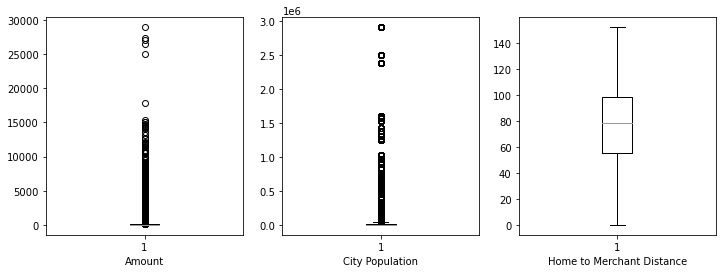

In [684]:
# Plotting Box plots for extreme values and outlier check

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.xlabel("Amount")
plt.boxplot(cc_train.amt)

plt.subplot(1,3,2)
plt.xlabel("City Population")
plt.boxplot(cc_train.city_pop)

plt.subplot(1,3,3)
plt.xlabel("Home to Merchant Distance")
plt.boxplot(cc_train.dist)




plt.show()


There are clearly outliers in "amt" and "city_pop" columns

The minimum age seems to be 13 , indicating a teen debit card , account jointly held with parent.There appears to be a single outlier with age 96 and it is being left untreated as it is not causing any skewness in the data.


**OUTLIER TREATMENT**


In [685]:
# The statistical summary shows very large "amt"values maximum being 28948.90
# Further checking for the unusually large values.
cc_train[cc_train["amt"] > 5000].category.value_counts()

travel          106
shopping_pos     15
shopping_net     15
Name: category, dtype: int64

In [686]:
# Transactions categories with large amounts
sopping_net =cc_train[(cc_train["amt"] > 5000) & (cc_train["category"]=="shopping_net")]["amt"].max()
shopping_pos = cc_train[(cc_train["amt"] > 5000) & (cc_train["category"]=="shopping_pos")]["amt"].max()
travel = cc_train[(cc_train["amt"] > 5000) & (cc_train["category"]=="travel")]["amt"].max()
print("Total High Value Shopping_net :",int(sopping_net), 
      "\nTotal High Value Shopping_pos :",int(shopping_pos),
      "\nTotal High Value travel       :",int(travel) )


Total High Value Shopping_net : 9555 
Total High Value Shopping_pos : 9754 
Total High Value travel       : 28948


OBSERVATION

The extremely high transactions in amount column pertains to travel and shopping which can be possible on high value transactions. 
Transforming the amount column to log amount for better analysis.

In [687]:
# Checking the outliers by inter quartile range and replacing with lower and upper limits 

def outlier_thresholds(df, col):
    quartile1 = df[col].quantile(0.01)
    quartile3 = df[col].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def outlier_check(df, col):
    low_limit, up_limit = outlier_thresholds(df , col)
    
    if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
def replace_with_thresholds(df, col):
    low_limit, up_limit = outlier_thresholds(df, col)
    if low_limit > 0:
        df.loc[(df[col] < low_limit), col] = low_limit
        df.loc[(df[col] > up_limit), col] = up_limit
    else:
        df.loc[(df[col] > up_limit), col] = up_limit
        

In [688]:
# Check outliers in amt
print("Are trere outliers in Amount:  ",outlier_check(cc_train,"amt"))

# Checking minimum and maximum values in amount
print("\nMin and Max value before outlier treatment")
print("Minimum Value: ",cc_train.amt.min())
print("Maximum Value: ",cc_train.amt.max())

# Replacing outliers with maximum and minimum thresholds
replace_with_thresholds(cc_train, "amt")

# Re-Checking minimum and maximum values in amount
print("\nMin and Max value after outlier treatment")
print("Minimum Value: ",cc_train.amt.min())
print("Maximum Value: ",cc_train.amt.max())

Are trere outliers in Amount:   True

Min and Max value before outlier treatment
Minimum Value:  1.0
Maximum Value:  28948.9

Min and Max value after outlier treatment
Minimum Value:  1.0
Maximum Value:  1363.0915000000005


In [689]:
# Check outliers in city_pop
print("Are trere outliers in Amount:  ",outlier_check(cc_train,"city_pop"))

# Checking minimum and maximum values in amount
print("\nMin and Max value before outlier treatment")
print("Minimum Value: ",cc_train.city_pop.min())
print("Maximum Value: ",cc_train.city_pop.max())

Are trere outliers in Amount:   False

Min and Max value before outlier treatment
Minimum Value:  23
Maximum Value:  2906700


**EDA**

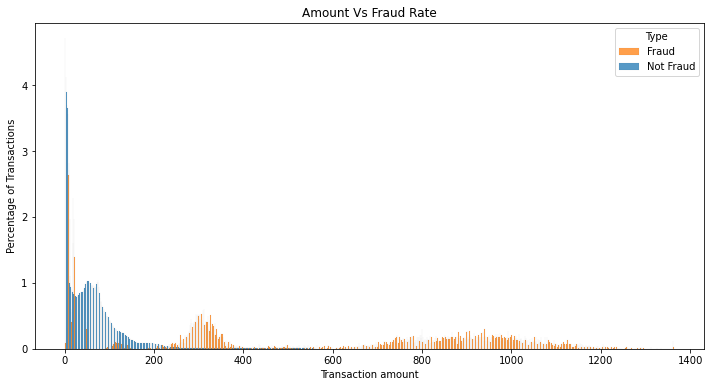

In [690]:
# Fraud Rate with respect to Transaction Amount
plt.figure(figsize = (12,6))
plt.title("Amount Vs Fraud Rate")
ax=sns.histplot(data=cc_train, x="amt", hue="is_fraud", common_norm = False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('Transaction amount')

plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Clearly transaction pertaining to huge amounts seems to have a very high fraud rate.


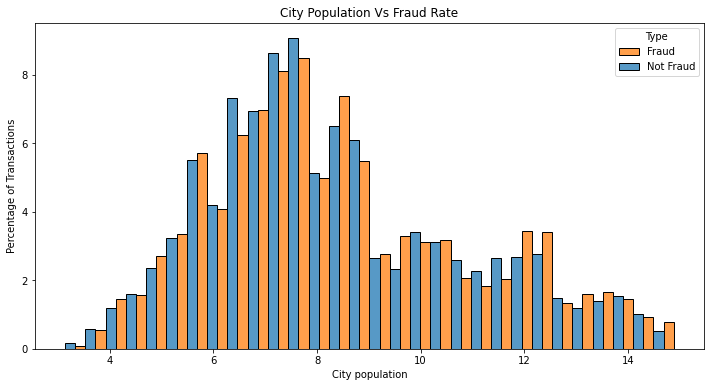

In [691]:
# City population vs Fraud rate-- For a better view plotting done on natural log of city population
city_population = np.log(cc_train["city_pop"])
plt.figure(figsize = (12,6))
plt.title("City Population Vs Fraud Rate")
ax=sns.histplot(x=city_population, hue=cc_train["is_fraud"], common_norm = False,stat='percent',multiple='dodge',bins=30)
ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('City population')

plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])


OBSERVATION:

City Populations seems to have very little impact on fraud rate though there is little spike in fraud rate in cities with larger population.


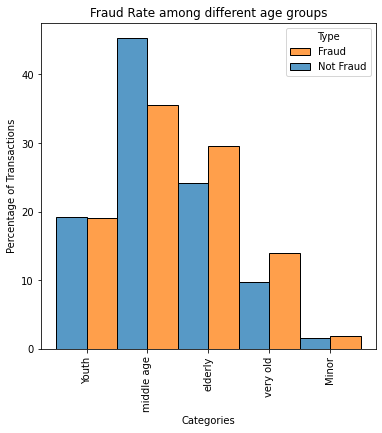

In [692]:
# Impact of Age on fraud rate
plt.figure(figsize = (6,6))
plt.title("Fraud Rate among different age groups")
ax=sns.histplot(data=cc_train, x="age_bin", hue="is_fraud", common_norm = False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('Categories')
plt.xticks(np.arange(len(cc_train.age_bin.unique())), rotation=90)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

Fraud rate is comaritively higher in aged customers followed by minor customers.


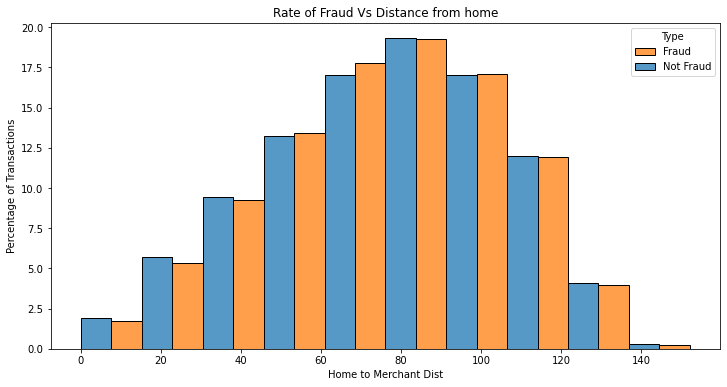

In [693]:
# Impact of home and merchant distance on Fraud rate
plt.figure(figsize = (12,6))
plt.title("Rate of Fraud Vs Distance from home")
ax=sns.histplot(data=cc_train, x="dist", hue="is_fraud", common_norm = False,stat='percent',multiple='dodge',bins=10)
ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('Home to Merchant Dist')

plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

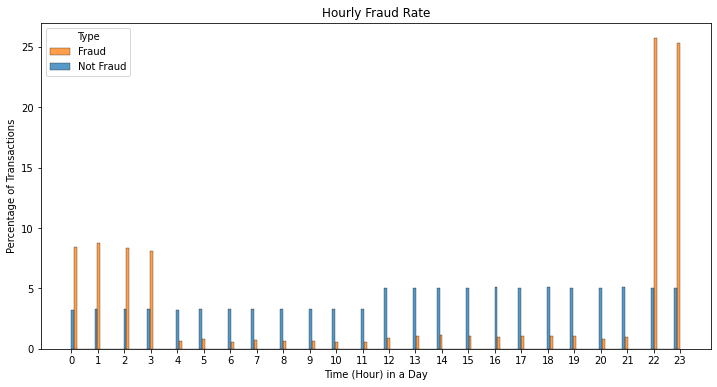

In [694]:
# hourly transactions and fraud trend

plt.figure(figsize = (12,6))
plt.title("Hourly Fraud Rate")
ax=sns.histplot(data=cc_train, x="hour", hue="is_fraud", common_norm = False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

OBSERVATION:

Evident Nocturnal Trend !!! Clearly fraudulent transactions are peaking during midnight specifically between 10 PM to 3 AM.

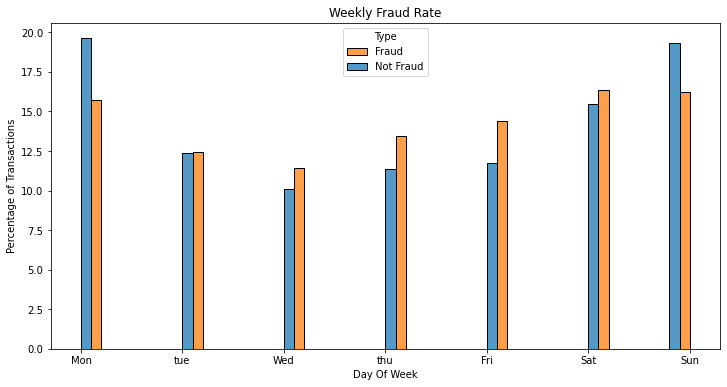

In [695]:
# Fraud rate over days of Week

plt.figure(figsize = (12,6))
plt.title("Weekly Fraud Rate")
ax=sns.histplot(data=cc_train, x="day_of_week", hue="is_fraud", common_norm = False,binwidth = 0.2,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('Day Of Week')
ax.set_xticks(np.arange(0,7,1))
ax.set_xticklabels(["Mon","tue","Wed","thu","Fri","Sat","Sun"])


plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])


Fraud rate seems to be higher on weekdays comparitively to week ends


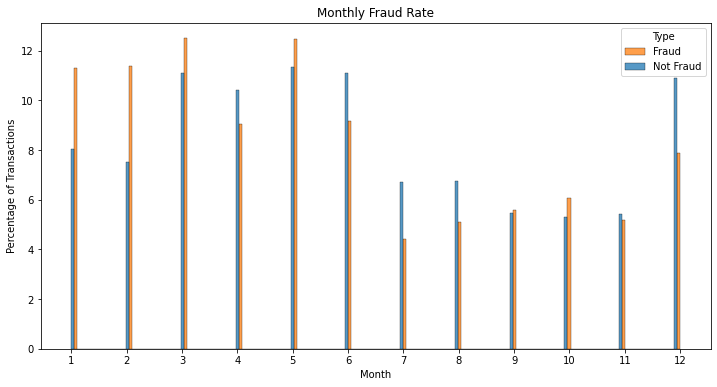

In [696]:
# Monthly fraud trend
plt.figure(figsize = (12,6))
plt.title("Monthly Fraud Rate")
ax=sns.histplot(data=cc_train, x="month", hue="is_fraud", common_norm = False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

Fraud rate seems to be higher at year start in months of Jan , Feb and March


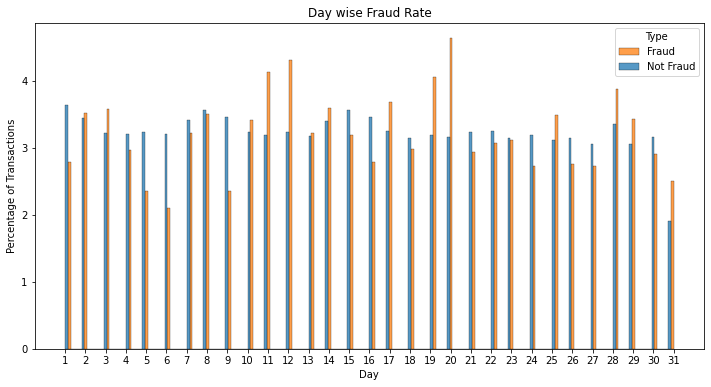

In [697]:
# fraud rate trend against day of month

plt.figure(figsize = (12,6))
plt.title("Day wise Fraud Rate")
ax=sns.histplot(data=cc_train, x="day_of_month", hue="is_fraud", common_norm = False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('Day')
plt.xticks(np.arange(1,32,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

There seems to be no obvious trend with fraud rate up and down on particular days

plt.figure(figsize = (15,6))
plt.title("Fraud rate in different card types")
ax=sns.histplot(data=cc_train, x="cc_type", hue="is_fraud", common_norm = False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('card types')
types = cc_train.cc_type.unique().tolist()
ax.set_xticklabels(labels=types,rotation=45)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

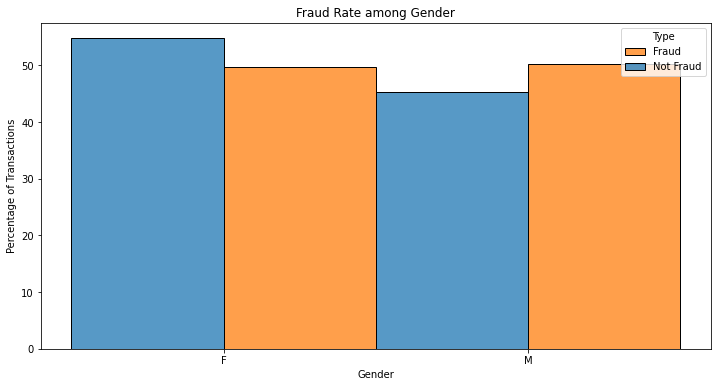

In [698]:
# Distribution of gender
plt.figure(figsize = (12,6))
plt.title("Fraud Rate among Gender")
ax=sns.histplot(data=cc_train, x="gender", hue="is_fraud", common_norm = False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

Gender seems to have an impact of fraud rate as males seems to show higher fraud rate compared to females.


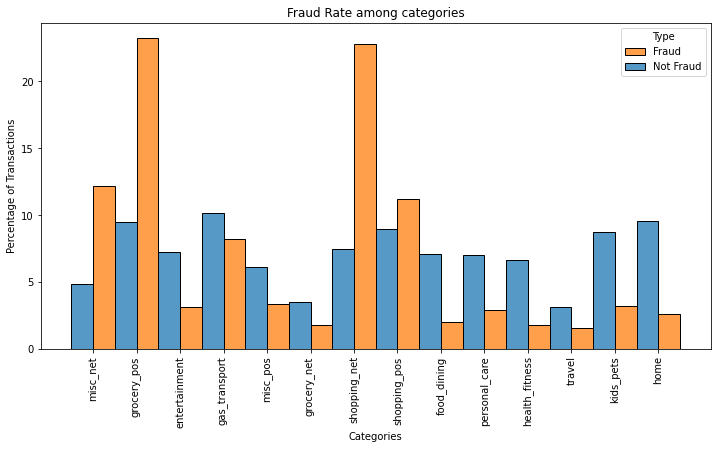

In [699]:
# fraud rate in various categories

plt.figure(figsize = (12,6))
plt.title("Fraud Rate among categories")
ax=sns.histplot(data=cc_train, x="category", hue="is_fraud", common_norm = False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('Categories')
plt.xticks(np.arange(len(cc_train.category.unique())), rotation=90)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

The fraud rate spiked with categories Shopping_net and Grocery_pos smaking them risky outlets which certainly should be checked and monitored for fraud.


In [700]:
### The plot shows map of the cities in USA with color varying intensity according to the fraud rate.

States = cc_train.groupby("state").sum()["is_fraud"].index
fraud =cc_train.groupby("state").sum()["is_fraud"].values

fig = px.choropleth(
    locations=States,
    locationmode="USA-states",
    scope="usa",
    color=fraud,
    color_continuous_scale="reds",
    labels={'States':'Fraudulent transactions'},
)
fig.add_scattergeo(
    locations=States,
    locationmode='USA-states',
    text=States,
    mode='text'
)

fig.show()


New york tops the list of fraud transactions followed by Texas.

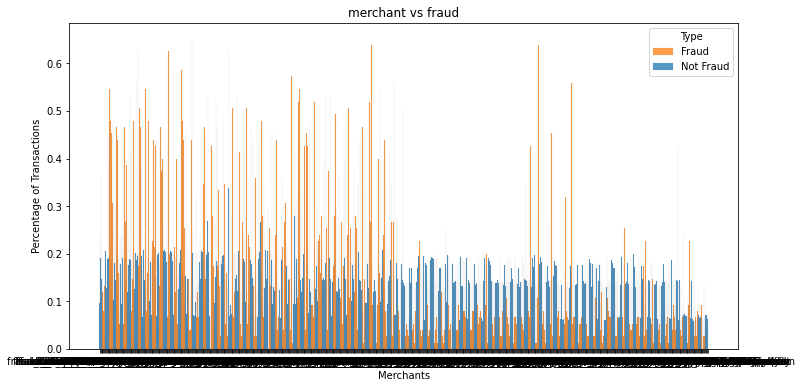

In [701]:
# Fraud rate in among various merchants

plt.figure(figsize = (12,6))
plt.title("merchant vs fraud")
ax=sns.histplot(data=cc_train, x="merchant", hue="is_fraud", common_norm = False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage of Transactions')
ax.set_xlabel('Merchants')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

In some merchants the fraud rate is distinctively higher

In [702]:
# Dropping redundant columns : 'street','zip', 'lat', 'long','trans_num','unix_time', 'merch_lat', 'merch_long', 'first', 'last'
drop_cols = [ 'merchant','city', 'state','street', 'job','zip', 'lat', 'long', 'trans_num',
              'unix_time', 'merch_lat', 'merch_long', 'first', 'last']
cc_train =cc_train.drop ( drop_cols , axis=1)

#final attributes after data cleaning
print(len(cc_train.columns))

12


Positives:  99.42 %
Negatives:  0.58 %


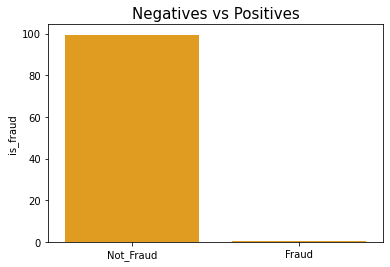

In [703]:
# Data Imbalance Check

print("\033[1mPositives:\033[0m ", round((cc_train.is_fraud.value_counts()[0]/len(cc_train)) * 100 , 2),"%")
print("\033[1mNegatives:\033[0m ",round((cc_train.is_fraud.value_counts()[1]/len(cc_train)) * 100 , 2),"%")

plt.figure(figsize = (6,4))
ax=sns.barplot(cc_train.is_fraud.value_counts().index,
            round(cc_train.is_fraud.value_counts()/len(cc_train) * 100 , 2),
            color = "orange" )
plt.title("Negatives vs Positives",fontsize = 15)
ax.set_xticklabels(["Not_Fraud","Fraud"])
plt.show()

As can be seen the target classes 'Fraud' and 'Not Fraud' are heavily imbalanced with negative class comprising of whooping 99.4% of records and positive class merely 0.6 %. Class imbalance can lead to bias in predictions towards majority class in this case the non fraudulent transactions. But as we want to build a model that predicts fraudulent transactions ,balancing the classes before training the model is of utmost priority.

Upsampling of positive class by SMOTE is being performed for tackeling the problem.



##### DUMMY VARIABLES

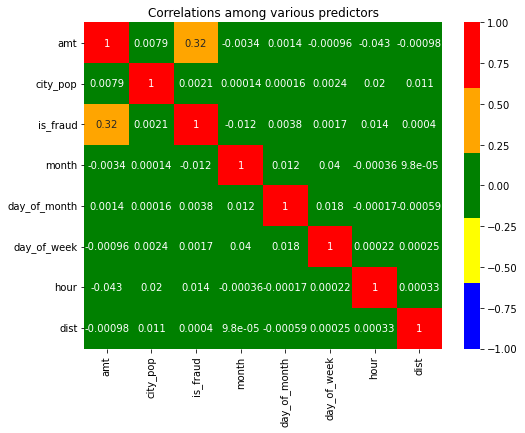

In [704]:
# Lets check the correlation among numeric columns by plotting heatmap.
plt.figure(figsize = (8,6))
sns.heatmap(cc_train.corr() , annot =True , vmax=1 , vmin=-1 , cmap =["blue","yellow","green","orange","red"])
plt.title("Correlations among various predictors")
plt.show()

All the numerical columns appear to be independent of each other

#### X Train y Train creation

In [705]:
X_train = cc_train.drop("is_fraud" , axis=1)
y_train = cc_train["is_fraud"]

In [706]:
# deleting the redundent variables for memory optimization
del cc_train

In [707]:
# Extracting the categorical and numerical features of the dataset
cat_cols = X_train.select_dtypes("object").columns.to_list()
num_cols = X_train.select_dtypes("number").columns.to_list()

print(cat_cols)
print(num_cols)

['category', 'gender', 'age_bin', 'cc_type']
['amt', 'city_pop', 'month', 'day_of_month', 'day_of_week', 'hour', 'dist']


In [708]:
# Dummy variable creation on attributes category, gender,state,weekday using one hot encoding
# Dropping the redundant columns after dummy creation

dummies = pd.get_dummies( X_train[cat_cols] , drop_first = True)
X_train = pd.concat( [X_train , dummies] , axis=1)
X_train.drop( cat_cols, axis=1 , inplace = True)

del dummies
len(X_train.columns)


30

In [709]:
# Scaling all numerical columns variables by performing StandardScaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X_train[num_cols])
           
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 30 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   amt                                                1296675 non-null  float64
 1   city_pop                                           1296675 non-null  int64  
 2   month                                              1296675 non-null  int64  
 3   day_of_month                                       1296675 non-null  int64  
 4   day_of_week                                        1296675 non-null  int64  
 5   hour                                               1296675 non-null  int64  
 6   dist                                               1296675 non-null  float64
 7   category_food_dining                               1296675 non-null  uint8  
 8   category_gas_transport                             1296675 non

In [710]:
# for memory optimization
X_train[num_cols] = X_train[num_cols].astype("int8")
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 30 columns):
 #   Column                                             Non-Null Count    Dtype
---  ------                                             --------------    -----
 0   amt                                                1296675 non-null  int8 
 1   city_pop                                           1296675 non-null  int8 
 2   month                                              1296675 non-null  int8 
 3   day_of_month                                       1296675 non-null  int8 
 4   day_of_week                                        1296675 non-null  int8 
 5   hour                                               1296675 non-null  int8 
 6   dist                                               1296675 non-null  int8 
 7   category_food_dining                               1296675 non-null  uint8
 8   category_gas_transport                             1296675 non-null  uint8
 9   ca

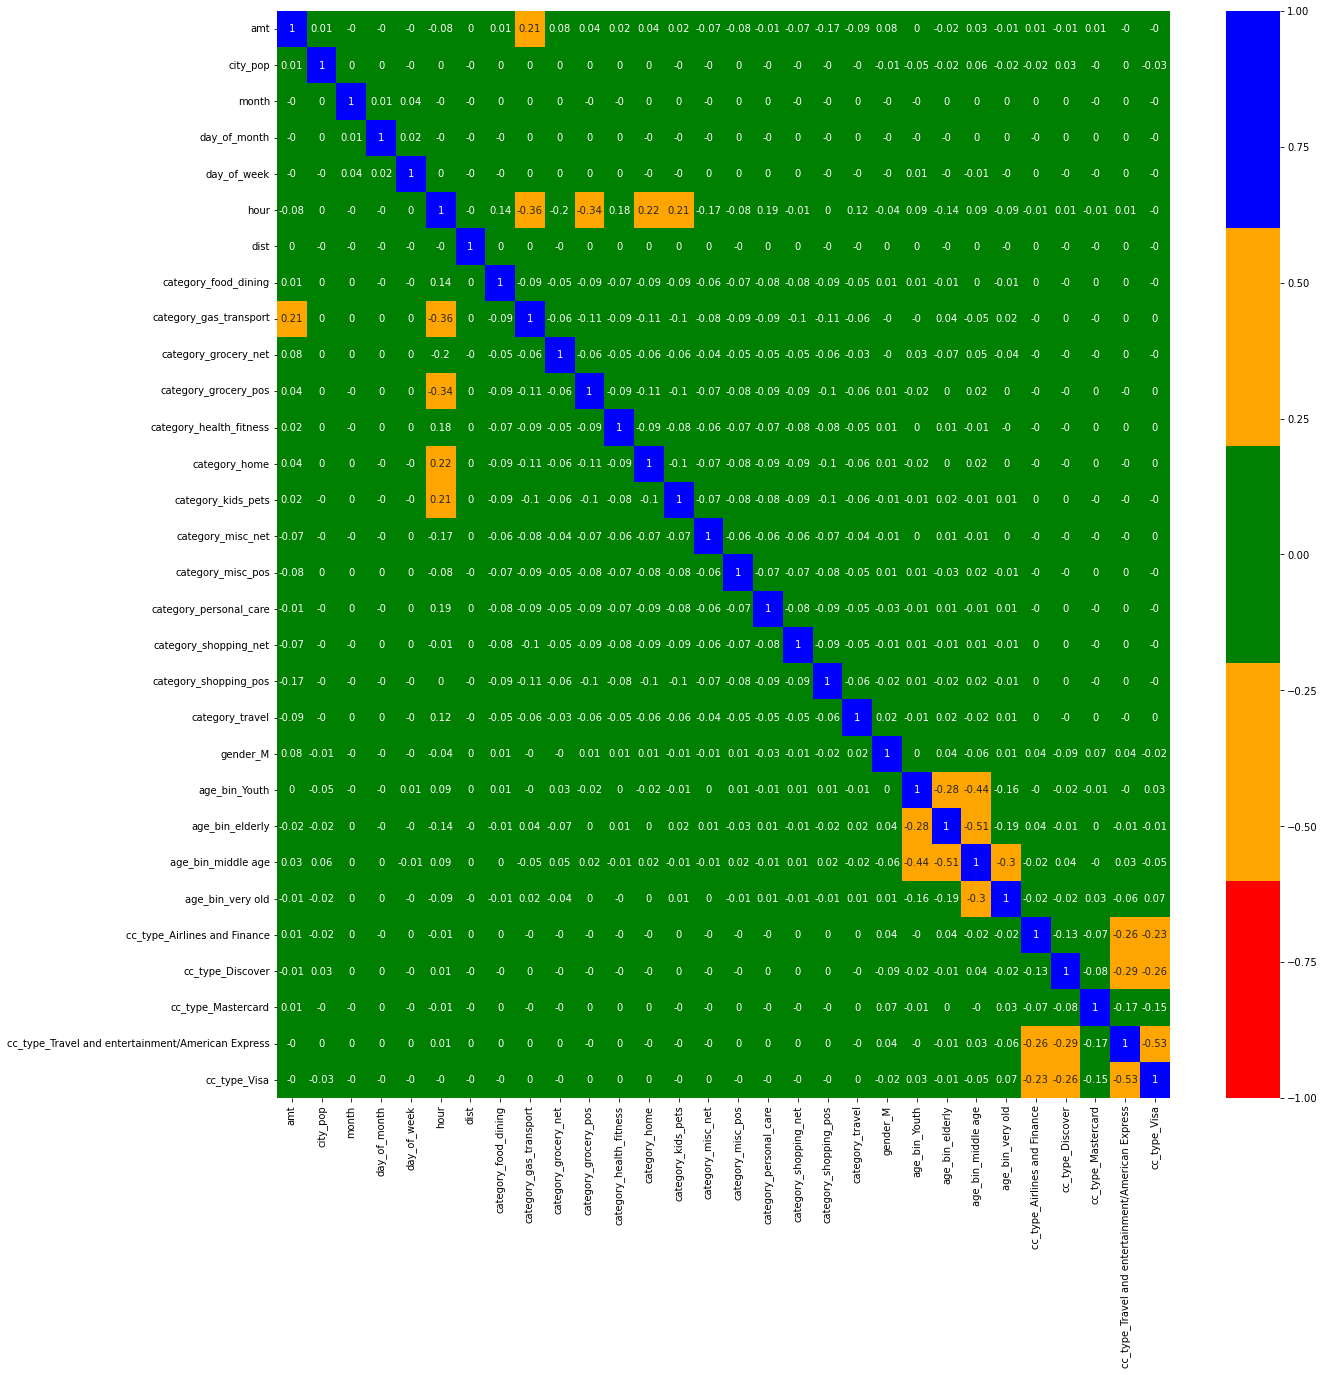

In [711]:
# Checking collinearity among features
cm=round(X_train.corr() , 2)
plt.figure(figsize = (20,20))
sns.heatmap(cm , cmap=["Red","Orange","green","orange","Blue"] ,vmin=-1,vmax=1, annot = True)
plt.show()

In [713]:
# Upsampling of minority class trough SMOTE
smt=SMOTE(sampling_strategy = 0.6, random_state = 24, ) # SMOTE fitting with positive negative class ratio of 0.6

X_smote , y_smote = smt.fit_resample(X_train,y_train)  


In [714]:
# Upsampling after SMOTE
print("\033[1mNegatives vs Positves before SMOTE:\033[0m\n",
      y_train.value_counts())
print("\n\033[1mNegatives vs positives after SMOTE:\033[0m\n",
      y_smote.value_counts())

Negatives vs Positves before SMOTE:
 0    1289169
1       7506
Name: is_fraud, dtype: int64

Negatives vs positives after SMOTE:
 0    1289169
1     773501
Name: is_fraud, dtype: int64


In [715]:
773501/1289169

0.5999996897226042

In [716]:
# X_train being huge dataset is being deleted for memory optimization.
# y_train is being retained for cost benefit analysis 
del X_train

#### MODEL BUILDING

#### Logistic Regression

In [717]:
# fitting a Logistic Regression classifier 
logreg = LogisticRegression(n_jobs=-1, random_state=20, solver="saga")
logreg.fit(X_smote,y_smote)

LogisticRegression(n_jobs=-1, random_state=20, solver='saga')

In [718]:
print(classification_report(y_smote, logreg.predict(X_smote)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95   1289169
           1       0.95      0.88      0.91    773501

    accuracy                           0.94   2062670
   macro avg       0.94      0.93      0.93   2062670
weighted avg       0.94      0.94      0.94   2062670



<AxesSubplot:title={'center':'Confusion Matrix '}, xlabel='Predicted label', ylabel='True label'>

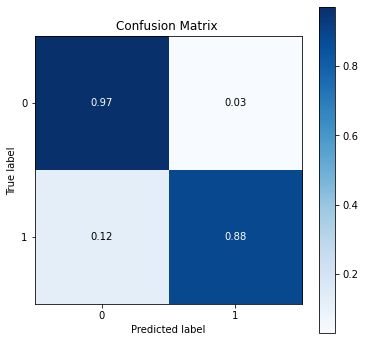

In [719]:
#Plotting confusion matrix of the model
def plot_cm(classifier):
    fig = skplt.metrics.plot_confusion_matrix(
         y_smote,
         classifier.predict(X_smote),
         normalize=True,
         title="Confusion Matrix " ,
         figsize=(6,6),
            )
    return fig

plot_cm(logreg)

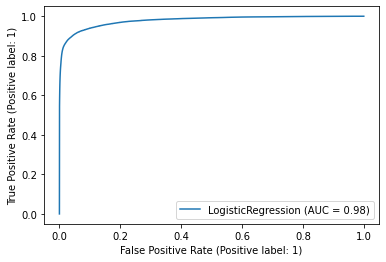

In [720]:
import sklearn
def plot_roc (classifier) :
    return sklearn.metrics.plot_roc_curve(classifier,X_smote,y_smote)
plot_roc(logreg)

#### DECISION TREE

In [721]:
dt = DecisionTreeClassifier(random_state=25, max_depth=5)
dt.fit(X_smote,y_smote)

DecisionTreeClassifier(max_depth=5, random_state=25)

In [722]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/bin/'
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

def get_dt_graph(classifier):
    dot_data = StringIO()
    export_graphviz(classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_smote.columns, 
                    class_names=['Fraud', "Not Fraud"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

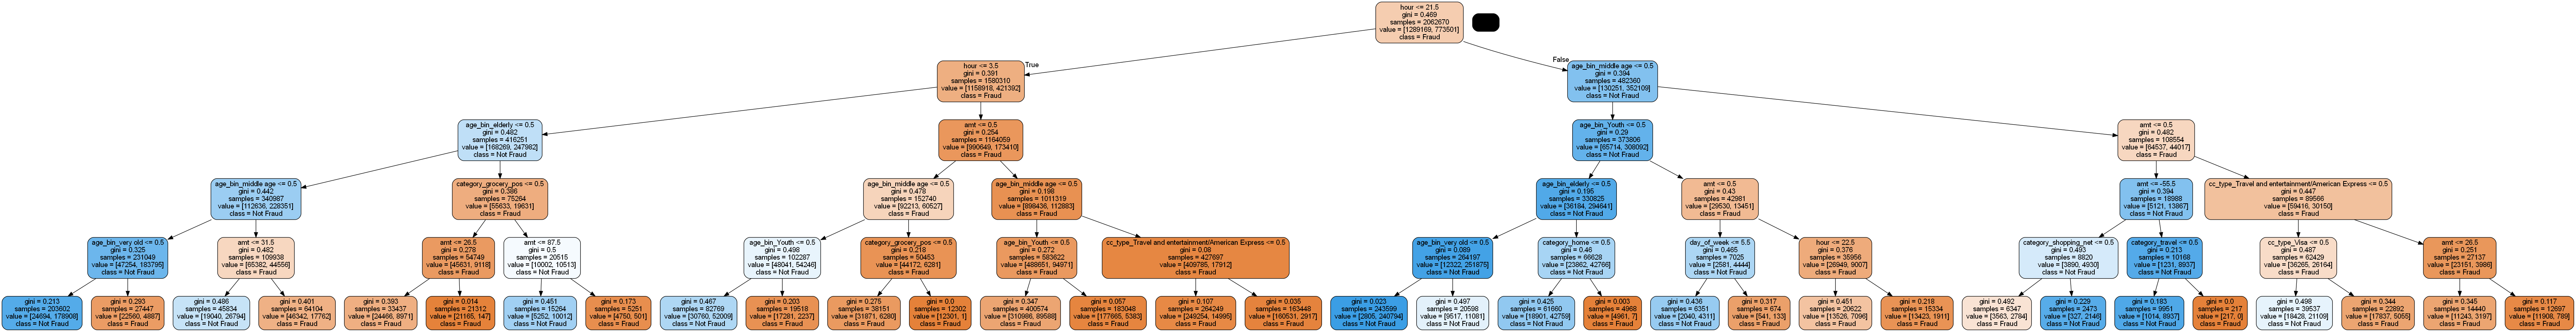

In [723]:
gph = get_dt_graph(dt)
Image(gph.create_png())

In [724]:
print(classification_report(y_smote, dt.predict(X_smote)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88   1289169
           1       0.82      0.77      0.80    773501

    accuracy                           0.85   2062670
   macro avg       0.84      0.84      0.84   2062670
weighted avg       0.85      0.85      0.85   2062670



<AxesSubplot:title={'center':'Confusion Matrix '}, xlabel='Predicted label', ylabel='True label'>

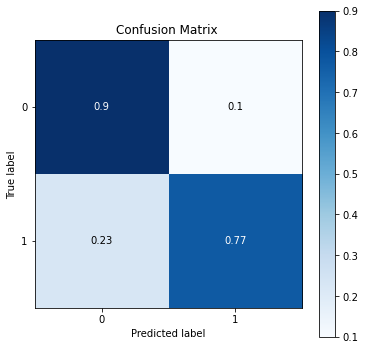

In [725]:
plot_cm(dt)

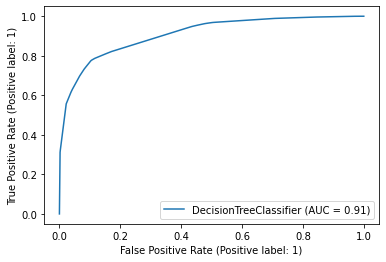

In [726]:

plot_roc(dt)

#### Decision tree with hyperparameter tuning

In [727]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

dt_best= DecisionTreeClassifier(random_state=20)

params = {
    'min_samples_leaf': [10,50,100,500],
    'max_features': [3,5,10,15],
    'criterion': ["entropy"]
}
grid_search = GridSearchCV(estimator=dt_best, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "precision")

In [728]:
%%time
grid_search.fit(X_smote, y_smote)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
CPU times: total: 7.91 s
Wall time: 4min 36s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=20), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_features': [3, 5, 10, 15],
                         'min_samples_leaf': [10, 50, 100, 500]},
             scoring='precision', verbose=1)

In [729]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_features=3, min_samples_leaf=10,
                       random_state=20)

In [730]:
# Classification report
print(classification_report(y_smote, dt_best.predict(X_smote)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98   1289169
           1       0.96      0.97      0.97    773501

    accuracy                           0.97   2062670
   macro avg       0.97      0.97      0.97   2062670
weighted avg       0.97      0.97      0.97   2062670



<AxesSubplot:title={'center':'Confusion Matrix '}, xlabel='Predicted label', ylabel='True label'>

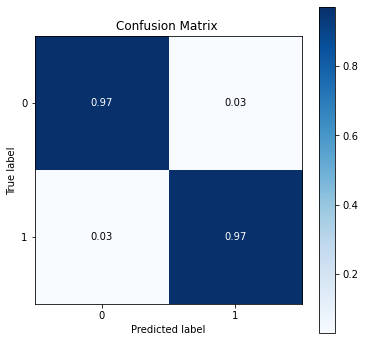

In [731]:
plot_cm ( dt_best)

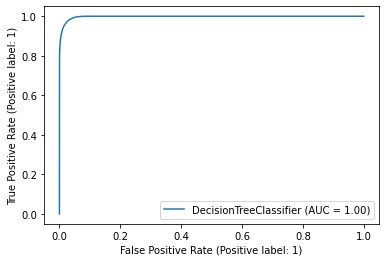

In [732]:
plot_roc(dt_best)

The precision and auc of Decision Tree with hyperparameter tuning is far better compared to normal fit.
The Auc of hyperparameter tuned model is almost 1 indicating a 100 percent fit.
Though the model appears to be overfitting  on the train data it will give better results on test data. This is because the train data is balanced with synthetic records and test data is higly imbalanced.

#### RANDOM FOREST

In [733]:
# Fitting Random forest Classifier without Hyperparameter tuning
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=20)

In [734]:
rf.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42)

In [735]:
print(classification_report(y_smote, rf.predict(X_smote)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1289169
           1       0.99      0.99      0.99    773501

    accuracy                           0.99   2062670
   macro avg       0.99      0.99      0.99   2062670
weighted avg       0.99      0.99      0.99   2062670



<AxesSubplot:title={'center':'Confusion Matrix '}, xlabel='Predicted label', ylabel='True label'>

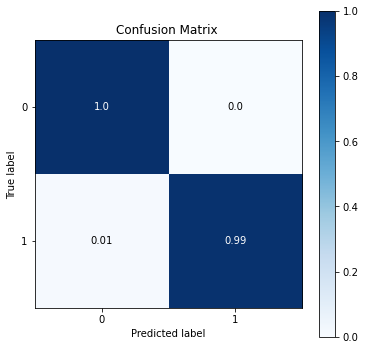

In [736]:
plot_cm(rf)

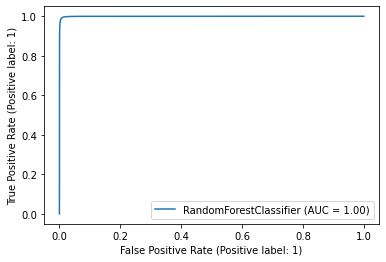

In [737]:
plot_roc(rf)

#### Fitting with hyperparameters tuning

In [738]:
rf_best= RandomForestClassifier(random_state=20)

params = {
    'n_estimators' : [20],
    'max_depth': [50],
    'max_features': [15],
    'criterion': ["entropy"]
}
grid_search = GridSearchCV(estimator=rf_best, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "precision")

In [739]:
%%time
grid_search.fit(X_smote, y_smote)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
CPU times: total: 4min 39s
Wall time: 11min 24s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [50],
                         'max_features': [15], 'n_estimators': [20]},
             scoring='precision', verbose=1)

In [740]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=15,
                       n_estimators=20, random_state=20)

In [741]:
# Classification report
print(classification_report(y_smote, rf_best.predict(X_smote)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00    773501

    accuracy                           1.00   2062670
   macro avg       1.00      1.00      1.00   2062670
weighted avg       1.00      1.00      1.00   2062670



<AxesSubplot:title={'center':'Confusion Matrix '}, xlabel='Predicted label', ylabel='True label'>

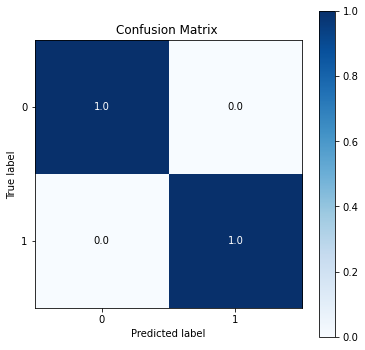

In [742]:
plot_cm(rf_best)


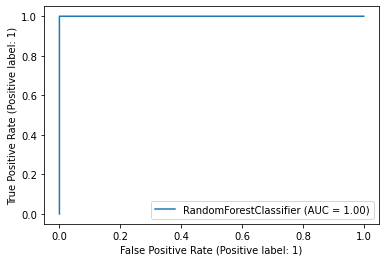

In [743]:
plot_roc(rf_best)

The hyperparameter tuned Random Forest is 100% fit and will work better as its precision on test data  will be higher than all other models on test.

Lets check the evaluation metrics on test data to see how effective our built models are in predicting.

#### TEST DATA PREPARATION

In [744]:
# Reading test data
cc_test = pd.read_csv(r"C:\Users\admin\Desktop\UPGRAD_IIIT BGLORE\datasets\Analysis\fraudTest.csv")
cc_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [745]:
# Missing value check
cc_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### DATA PREPARATION

In [746]:
# Checking if index and "unnamed: 0" are same 
no_match= [index for index in range(len(cc_test)) if cc_test.loc[index,"Unnamed: 0"] != index ]
print("No. of mismatches :",len(no_match))

# Dropping column "Unnamed: 0" as it is nothing but the index of the dataframe
cc_test.drop("Unnamed: 0", axis = 1 , inplace = True)

#### Extracting new columns

# Deriving age from "dob" column
cc_test["trans_date_trans_time"]= pd.to_datetime(cc_test.trans_date_trans_time)
cc_test["dob"] = pd.to_datetime(cc_test.dob)
cc_test["age"] =cc_test.trans_date_trans_time - cc_test.dob 
cc_test["age"] = cc_test["age"].apply(lambda x  : int(x.days/365))

# Dropping column "dob" as it is redundant
cc_test.drop("dob" , axis=1, inplace=True)

# Binning age into categories : "Minor","youth","middle age","elderly","very old"
cc_test["age_bin"] = cc_test.age.apply(age_bucket) 
cc_test.drop("age", axis=1, inplace=True)

# extracting the first digit of credit card number as new column
cc_test["cc_type"]=cc_test.cc_num.apply(lambda x : str(x)[0])
# Mapping the numbers to their respective categories
cc_test["cc_type"]= cc_test.cc_type.apply(card_type)
# Dropping the redundant column cc_num
cc_test.drop("cc_num", axis=1, inplace = True)


# Deriving columns month,day, weekday and hour for specific transaction days and time using the "trans_date_trans_time" 
# attribute.

from datetime import datetime
cc_test['month'] = cc_test.trans_date_trans_time.dt.month
cc_test['day_of_month'] = cc_test.trans_date_trans_time.dt.day
cc_test['day_of_week'] = cc_test.trans_date_trans_time.dt.weekday
cc_test['hour'] = cc_test.trans_date_trans_time.dt.hour



print("\033[1mMonth of transaction\033[0m\n", cc_test.month.head(),"\n\n",
    "\033[1mDay of transaction\033[0m\n", cc_test.day_of_month.head(),"\n\n",
      "\033[1mWeekday of Transaction\033[0m\n", cc_test.day_of_week.head(),"\n\n",
      "\033[1mHour Of Transaction\033[0m\n", cc_test.hour.head(),"\n\n"
      )


# Dropping the redundant column "trans_date_trans_time"
cc_test.drop( "trans_date_trans_time" , axis = 1 , inplace = True)


import math
# calculate the distance bewteen home and merchant in km

def haversine(lat1,lon1,lat2,lon2):
    '''The haversine formula determines the great-circle 
    distance between two points on a sphere given their longitudes and latitudes.'''
    
    R = 6372  # Earth radius in meters
    
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

cords = []
for lat1,lon1,lat2,lon2 in zip(cc_test.lat,cc_test.long,cc_test.merch_lat,cc_test.merch_long):
  cords.append(round( haversine(lat1,lon1,lat2,lon2),2 ) )
cc_test["dist"] = pd.Series(cords)
cc_test.dist.head()

#### DATA WRANGLING

# Numerical columns statistical summary
cc_test[["amt","city_pop","dist"]].describe()


No. of mismatches : 0
Month of transaction
 0    6
1    6
2    6
3    6
4    6
Name: month, dtype: int64 

 Day of transaction
 0    21
1    21
2    21
3    21
4    21
Name: day_of_month, dtype: int64 

 Weekday of Transaction
 0    6
1    6
2    6
3    6
4    6
Name: day_of_week, dtype: int64 

 Hour Of Transaction
 0    12
1    12
2    12
3    12
4    12
Name: hour, dtype: int64 




,amt,city_pop,dist
count,555719.000000,5.557190e+05,555719.000000
mean,69.392810,8.822189e+04,76.116844
std,156.745941,3.003909e+05,29.121650
min,1.000000,2.300000e+01,0.120000
25%,9.630000,7.410000e+02,55.295000
50%,47.290000,2.408000e+03,78.190000
75%,83.010000,1.968500e+04,98.540000
max,22768.110000,2.906700e+06,150.950000


**OUTLIER TREATMENT**

In [747]:
# Check outliers in amt
print("Are trere outliers in Amount:  ",outlier_check(cc_test,"amt"))

# Checking minimum and maximum values in amount
print("\nMin and Max value before outlier treatment")
print("Minimum Value: ",cc_test.amt.min())
print("Maximum Value: ",cc_test.amt.max())

# Replacing outliers with maximum and minimum thresholds
replace_with_thresholds(cc_test, "amt")

# Re-Checking minimum and maximum values in amount
print("\nMin and Max value after outlier treatment")
print("Minimum Value: ",cc_test.amt.min())
print("Maximum Value: ",cc_test.amt.max())

# Check outliers in city_pop
print("Are trere outliers in City_pop:  ",outlier_check(cc_test,"city_pop"))

# Checking minimum and maximum values in amount
print("\nMin and Max value before outlier treatment")
print("Minimum Value: ",cc_test.city_pop.min())
print("Maximum Value: ",cc_test.city_pop.max())

Are trere outliers in Amount:   True

Min and Max value before outlier treatment
Minimum Value:  1.0
Maximum Value:  22768.11

Min and Max value after outlier treatment
Minimum Value:  1.0
Maximum Value:  1297.7464999999963
Are trere outliers in City_pop:   False

Min and Max value before outlier treatment
Minimum Value:  23
Maximum Value:  2906700


In [748]:
# Dropping redundant columns 
cc_test =cc_test.drop ( drop_cols , axis=1)

#final attributes after data cleaning
print(len(cc_test.columns))

12


In [749]:
X_test = cc_test.drop("is_fraud" , axis=1)
y_test = cc_test["is_fraud"]

del cc_test

#### Category Encoding and Feature Scaling

In [750]:
# Dummy variable creation on attributes category, gender,state,weekday using one hot encoding
# Dropping the redundant columns after dummy creation

dummies = pd.get_dummies( X_test[cat_cols] , drop_first = True)
X_test = pd.concat( [X_test , dummies] , axis=1)
X_test.drop( cat_cols, axis=1 , inplace = True)

del dummies
len(X_test.columns)


30

In [751]:
# Scaling all numerical columns variables by performing MinMaxScaling
scaler.transform(X_test[num_cols])

array([[1.36554703e-03, 1.14726886e-01, 4.54545455e-01, ...,
        1.00000000e+00, 5.21739130e-01, 1.61385748e-01],
       [2.11733206e-02, 9.59858973e-05, 4.54545455e-01, ...,
        1.00000000e+00, 5.21739130e-01, 6.89718643e-01],
       [2.95721690e-02, 1.18599349e-02, 4.54545455e-01, ...,
        1.00000000e+00, 5.21739130e-01, 3.88311859e-01],
       ...,
       [6.30500961e-02, 1.25951387e-03, 1.00000000e+00, ...,
        5.00000000e-01, 1.00000000e+00, 5.30830923e-01],
       [5.13181383e-03, 3.64677603e-05, 1.00000000e+00, ...,
        5.00000000e-01, 1.00000000e+00, 3.47883250e-01],
       [2.72595490e-02, 3.99005462e-02, 1.00000000e+00, ...,
        5.00000000e-01, 1.00000000e+00, 4.76137260e-01]])

In [752]:
# for memory optimization
X_test[num_cols] = X_test[num_cols].astype("int8")
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 30 columns):
 #   Column                                             Non-Null Count   Dtype
---  ------                                             --------------   -----
 0   amt                                                555719 non-null  int8 
 1   city_pop                                           555719 non-null  int8 
 2   month                                              555719 non-null  int8 
 3   day_of_month                                       555719 non-null  int8 
 4   day_of_week                                        555719 non-null  int8 
 5   hour                                               555719 non-null  int8 
 6   dist                                               555719 non-null  int8 
 7   category_food_dining                               555719 non-null  uint8
 8   category_gas_transport                             555719 non-null  uint8
 9   category_grocer

X_test.drop(['age_bin_middle age','cc_type_Travel and entertainment/American Express'], axis=1 , inplace = True)

In [753]:
X_smote.columns

Index(['amt', 'city_pop', 'month', 'day_of_month', 'day_of_week', 'hour',
       'dist', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'age_bin_Youth', 'age_bin_elderly', 'age_bin_middle age',
       'age_bin_very old', 'cc_type_Airlines and Finance', 'cc_type_Discover',
       'cc_type_Mastercard',
       'cc_type_Travel and entertainment/American Express', 'cc_type_Visa'],
      dtype='object')

In [754]:
X_test.columns

Index(['amt', 'city_pop', 'month', 'day_of_month', 'day_of_week', 'hour',
       'dist', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'age_bin_Youth', 'age_bin_elderly', 'age_bin_middle age',
       'age_bin_very old', 'cc_type_Airlines and Finance', 'cc_type_Discover',
       'cc_type_Mastercard',
       'cc_type_Travel and entertainment/American Express', 'cc_type_Visa'],
      dtype='object')

#### MODEL EVALUATION

In [755]:
models= [logreg,dt, dt_best, rf , rf_best]
for val in models:
    print(val,"\n")
    print(classification_report(y_test, val.predict(X_test)))

LogisticRegression(n_jobs=-1, random_state=20, solver='saga') 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.01      0.04      0.01      2145

    accuracy                           0.98    555719
   macro avg       0.50      0.51      0.50    555719
weighted avg       0.99      0.98      0.98    555719

DecisionTreeClassifier(max_depth=5, random_state=25) 

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    553574
           1       0.02      0.57      0.04      2145

    accuracy                           0.90    555719
   macro avg       0.51      0.74      0.49    555719
weighted avg       0.99      0.90      0.94    555719

DecisionTreeClassifier(criterion='entropy', max_features=3, min_samples_leaf=10,
                       random_state=20) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    55

Clearly Random forest with hyperparameter tuning is by far the best with a precion of almost 18%.

In [756]:

index_list = ["Logistic Regression", "Decision Tree ", "Decision Tree- Hyperparameter tuning", 
              "RandomForest" , "RandomForest Hyperparameter tuning"]

eval_models = pd.DataFrame(index=index_list)
eval_models["Precision"] = [round ( ( precision_score( y_test, val.predict(X_test) ) ) * 100 , 2) for val in models]
eval_models["Not Fraud Precision"] = [round ( ( precision_score( y_test, val.predict(X_test), pos_label=0) ) * 100 , 2) 
                                      for val in models]

eval_models["Recall"] = [round ( ( recall_score( y_test, val.predict(X_test) ) ) * 100 , 2) for val in models]
eval_models["Accuracy"] = [round ( ( accuracy_score( y_test, val.predict(X_test) ) ) * 100 , 2) for val in models]


In [757]:
eval_models

,Precision,Not Fraud Precision,Recall,Accuracy
Logistic Regression,0.75,99.62,3.78,97.71
Decision Tree,2.14,99.82,57.30,89.73
Decision Tree- Hyperparameter tuning,3.95,99.71,27.32,97.16
RandomForest,20.61,99.71,26.15,99.33
RandomForest Hyperparameter tuning,60.45,99.73,29.79,99.65


##### OBSERVATION :

Our model needs to identify as many fraudulent transactions as possible precisely.Though all the models are able to predict the non fraulent transactions highly precise way, they are unable to predict the fraud class much accurately.This is beacuase of heavy imbalnce between the two classes

After model building with different models and hyperparameter tuning Random forest model "rf_best" seems to output the best "Precision" score of 60.45 .So deploying this model would give us the desired benefits.

### Model Deployment- Cost benefit Analysis

Cost benefit analysis is being performed to estimate the final savings made if the model is deployed.
The following steps were followed:
1. Calculate the monthly average transactions.
2. Calculate Monthly Average Fraud transactions.
3. Calculate the amount loss per fraudulent transactions.
4. calculate the monthly loss incured due to fradulent transactions i.e monthly average transaction multiplied by amount per fraud transaction
4. Basing on evaluation metrics obtained from our best model "rf_best" 60.45% fraudent transactions are correctly being detected accurately.
5. using the above metric calculate the monthly loss after model deployment by calculating the cost incured for human intervention for detected fraud and the fraudulent transactions not detected.
6. deduct the loss incured after model deployment from loss before model deployment.

In [758]:
cc_train=pd.read_csv(r"C:\Users\admin\Desktop\UPGRAD_IIIT BGLORE\datasets\Analysis\fraudTrain.csv")
cc_test=pd.read_csv(r"C:\Users\admin\Desktop\UPGRAD_IIIT BGLORE\datasets\Analysis\fraudTest.csv")

In [759]:
df = pd.concat([cc_train,cc_test] , axis=0 )

In [760]:
# Calculate avergae montly transactions 
avg_mon_trans = round(len(df) / 12 , 2)
avg_mon_fraud_trans= round (len(df[df.is_fraud==1]) / 12 , 2)
print("Average Monthly transactions : " , avg_mon_trans)
print("Average_monthly Fraud Transactions : ", avg_mon_fraud_trans)

Average Monthly transactions :  154366.17
Average_monthly Fraud Transactions :  804.25


In [761]:
# Average monthly fraud
avg_fraud_amt = round (sum(df[df.is_fraud==1].amt) / len(df[df.is_fraud==1]) , 2)

print("Average amt per fraud : ",avg_fraud_amt)

Average amt per fraud :  530.66


In [765]:
# Montly loss before model deployment
loss_before_model = round (avg_mon_fraud_trans * avg_fraud_amt , 2)
loss_before_model

426783.3

In [762]:
# Monthly frauds detected by model
TF = round ((60.45 * avg_mon_fraud_trans) /100 , 2)
TF

486.17

In [763]:
# Monthly fraud not detected by model
FN = round (((100- 60.45) * avg_mon_fraud_trans) /100 , 2)
FN

318.08

In [766]:
# Monthlky loss after model deployement
loss_after_model =round ((TF*1.5) + (FN*avg_fraud_amt) , 2)
loss_after_model

169521.59

In [767]:
# Final Savings 
savings=round (loss_before_model - loss_after_model ,2)
savings

257261.71

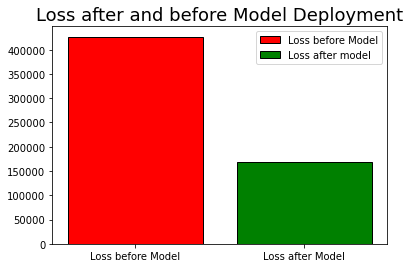

In [777]:
# plotting the results
plt.bar("Loss before Model",loss_before_model,color='red',edgecolor='black')
plt.bar("Loss after Model",loss_after_model,color='green',edgecolor='black')

plt.title('Loss after and before Model Deployment',fontsize=18)
plt.legend(["Loss before Model","Loss after model"])
plt.show()

The model seems to have a strong impact on identifying the frauds and mitigating the losses incured by the financial insitutions ,thus benefiting the company in tousands of dollars.
The overall savings amount to  257261 dollars per month.

#### CONCLUSION:

Our Agenda was to deploy a machine learning model that predicts the fraudulent transactions. In orderto achieve the objective variou models including Logistic regression , Decision Trees and random Forests have been fit and tested on test data with relevent evaluation metrics. We have taken te precision score for evaluating the model as we need the best model on the basis of how accurately a model detects the positive class i.e fraud.

We have evaluated Random Forest model "rf_best" to be the best with a precision score of 60.45 %.
For determining the impact of te proposed model cost benefit analysis was performed using the actual data.

We could estimate an approximate a savings of 257261 dollars  per month if the model is deployed.Wile estimating the project deployment was kept at bay as it is a one time expense and we are speaking of long time impact of the model building.

An increase of almost 25000 dollars of savings per month is a fair rationale for deploying the model "rf_best"